## Aitken extrapolation
_MATH 420_ <br>

To prepare for this lesson, read https://en.wikipedia.org/wiki/Aitken%27s_delta-squared_process.

Here is a simple function that takes an array `f` and returns the Aitken extrapolated array. 

In [16]:
function aitken_extrapolation(f::Array)
    n = length(f)
    [f[k+2] - (f[k+2] - f[k+1])^2/((f[k+2] - f[k+1]) - (f[k+1] - f[k])) for k in 1:n-2]
end

aitken_extrapolation (generic function with 1 method)

For a sequence that is _exactly_ linearly convergent, the Aitken extrapolated array should immediately converge to the limit. Let's test on the sequence $k \mapsto 3 + 1/2^k$.  This sequence converges to 3.

In [17]:
X = [3 + 1/2^k for k in 1:10]

10-element Vector{Float64}:
 3.5
 3.25
 3.125
 3.0625
 3.03125
 3.015625
 3.0078125
 3.00390625
 3.001953125
 3.0009765625

The Aitken extrapolated array is a constant! It works!

In [18]:
aitken_extrapolation(X)

8-element Vector{Float64}:
 3.0
 3.0
 3.0
 3.0
 3.0
 3.0
 3.0
 3.0

For something that doesn't exactly converge linearly, the Aitken extrapolated array won't usually immediately converge to the limit, but its convergence should be faster. 

Let's try the sequence $k -> 3 + 1/2^k + 1/5^k$.

In [19]:
using Gadfly

In [20]:
Y = [3 + 1/2^k + 1/(5)^k for k in 1:20];

In [21]:
YY = aitken_extrapolation(Y)

18-element Vector{Float64}:
 3.0355731225296445
 3.0102156640181605
 3.002474566950784
 3.000540573007388
 3.00011225724371
 3.000022800915077
 3.000004588753374
 3.000000920056401
 3.0000001841963875
 3.0000000368541073
 3.000000007372008
 3.0000000014744974
 3.0000000002949068
 3.0000000000589813
 3.0000000000117963
 3.0000000000023594
 3.000000000000472
 3.000000000000095

In [22]:
X = [k for k in 1:length(Y)];

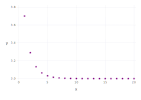

In [23]:
plot(x=X,y=Y,color=[colorant"purple"])

Here are both graphs.

In [37]:
p1 = layer(x=X, y=Y, Geom.point,color=[colorant"green"]);

In [38]:
p2 = layer(x=X[1:18], y=YY, Geom.point,color=[colorant"purple"]);

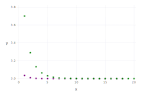

In [39]:
plot(p1,p2)

Super! The extrapolated sequence converges much faster.  